In [56]:
import pandas as pd
from scipy import stats

import seaborn as sns

In [2]:
df = pd.read_csv('/Users/aimaldastagirzada/Downloads/midterm_data.csv')

In [3]:
df

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4
...,...,...,...,...,...,...,...,...,...,...
4995,4996,48,8,45.000000,11,25,278.92,0,Tablet,Location 5
4996,4997,31,4,44.700747,9,12,78.97,0,Tablet,Location 2
4997,4998,34,5,27.146624,7,19,139.42,1,Desktop,Location 4
4998,4999,58,1,45.000000,11,24,203.42,0,Desktop,Location 5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           5000 non-null   int64  
 1   age              5000 non-null   int64  
 2   sessions         5000 non-null   int64  
 3   time_spent       5000 non-null   float64
 4   pages_visited    5000 non-null   int64  
 5   cart_items       5000 non-null   int64  
 6   cart_value       5000 non-null   float64
 7   checkout_status  5000 non-null   int64  
 8   device           4900 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 390.8+ KB


In [5]:
df.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4900,4970
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2538,1056
mean,2500.500000,41.538200,5.027200,25.158496,5.774400,14.966400,149.443146,0.272400,NaN,NaN
std,1443.520003,14.042734,2.594958,9.825536,2.570842,6.046336,68.711683,0.445239,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.268862,4.000000,10.000000,92.482500,0.000000,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.035361,6.000000,15.000000,143.440000,0.000000,NaN,NaN
75%,3750.250000,54.000000,7.000000,32.000361,8.000000,20.000000,198.380000,1.000000,NaN,NaN


In [16]:
df[df['age'].isnull() & df['sessions'].isnull() & df['time_spent'].isnull() & df['pages_visited'] & df['cart_items'] & ['cart_value'] & df['checkout_status'] & df['device'] & df['location']]


,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
userID,,,,,,,,,


In [23]:
empty_device = df[df['device'].isnull()]
empty_device 


,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
userID,,,,,,,,,
80,38,8,16.074280,1,8,69.84,0,NaN,Location 4
137,61,1,25.418891,6,20,140.39,1,NaN,Location 4
250,21,1,5.000000,1,5,41.39,0,NaN,Location 1
288,35,3,27.292828,6,23,236.13,0,NaN,Location 4
291,20,2,37.307904,9,15,157.54,1,NaN,Location 1
...,...,...,...,...,...,...,...,...,...
4687,35,5,45.000000,10,6,88.63,0,NaN,Location 4
4690,29,2,8.648351,2,13,125.84,0,NaN,Location 5
4764,55,1,35.940041,6,18,211.00,1,NaN,Location 4


In [24]:
test1 =df.copy()

In [31]:
df.drop(df[df['device'].isnull()].index, inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4900 entries, 1 to 5000
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              4900 non-null   int64  
 1   sessions         4900 non-null   int64  
 2   time_spent       4900 non-null   float64
 3   pages_visited    4900 non-null   int64  
 4   cart_items       4900 non-null   int64  
 5   cart_value       4900 non-null   float64
 6   checkout_status  4900 non-null   int64  
 7   device           4900 non-null   object 
 8   location         4871 non-null   object 
dtypes: float64(2), int64(5), object(2)
memory usage: 382.8+ KB


In [33]:
df.drop(df[df['location'].isnull()].index, inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4871 entries, 1 to 5000
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              4871 non-null   int64  
 1   sessions         4871 non-null   int64  
 2   time_spent       4871 non-null   float64
 3   pages_visited    4871 non-null   int64  
 4   cart_items       4871 non-null   int64  
 5   cart_value       4871 non-null   float64
 6   checkout_status  4871 non-null   int64  
 7   device           4871 non-null   object 
 8   location         4871 non-null   object 
dtypes: float64(2), int64(5), object(2)
memory usage: 380.5+ KB


In [35]:
df.describe()

,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status
count,4871.00000,4871.000000,4871.000000,4871.000000,4871.000000,4871.000000,4871.000000
mean,41.53295,5.023609,25.172038,5.777458,14.971258,149.459444,0.273455
std,14.04452,2.589914,9.821864,2.566198,6.054916,68.811486,0.445778
min,18.00000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000
25%,29.00000,3.000000,18.298029,4.000000,10.000000,92.415000,0.000000
50%,42.00000,5.000000,25.054759,6.000000,15.000000,143.020000,0.000000
75%,54.00000,7.000000,31.991099,8.000000,20.000000,198.550000,1.000000
max,65.00000,9.000000,90.000000,12.000000,25.000000,427.400000,1.000000


In [36]:
df

,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
userID,,,,,,,,,
1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4
...,...,...,...,...,...,...,...,...,...
4996,48,8,45.000000,11,25,278.92,0,Tablet,Location 5
4997,31,4,44.700747,9,12,78.97,0,Tablet,Location 2
4998,34,5,27.146624,7,19,139.42,1,Desktop,Location 4


In [ ]:
## Put them in age groups 



In [44]:
bins =[18, 28, 38, 50, 66] 
labels = ['18-27' , '28-37', '38-49', '50-64']
df ['Age Group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location,Age Group
userID,,,,,,,,,,
1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1,50-64
2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3,50-64
3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4,18-27
4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2,18-27
5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4,18-27
...,...,...,...,...,...,...,...,...,...,...
4996,48,8,45.000000,11,25,278.92,0,Tablet,Location 5,38-49
4997,31,4,44.700747,9,12,78.97,0,Tablet,Location 2,28-37
4998,34,5,27.146624,7,19,139.42,1,Desktop,Location 4,28-37


In [50]:
df.groupby('device')[['time_spent','pages_visited','cart_items', 'cart_value', 'checkout_status']].mean()


,time_spent,pages_visited,cart_items,cart_value,checkout_status
device,,,,,
Desktop,25.501610,5.858842,14.892942,149.291967,0.285488
Mobile,24.637274,5.662668,15.144672,151.106486,0.263938
Tablet,25.093259,5.731760,14.919528,147.408498,0.255365


In [51]:
df.groupby('location')[['time_spent','pages_visited','cart_items', 'cart_value', 'checkout_status']].mean()


,time_spent,pages_visited,cart_items,cart_value,checkout_status
location,,,,,
Location 1,25.657852,5.840580,15.183230,152.872505,0.280538
Location 2,24.967337,5.752137,15.012821,149.232628,0.267094
Location 3,24.875527,5.702405,14.891784,147.684780,0.265531
Location 4,25.165525,5.785019,14.783074,147.568424,0.283074
Location 5,25.198461,5.809120,15.002121,150.127911,0.270414


In [64]:
df

,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location,Age Group
userID,,,,,,,,,,
1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1,50-64
2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3,50-64
3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4,18-27
4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2,18-27
5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4,18-27
...,...,...,...,...,...,...,...,...,...,...
4996,48,8,45.000000,11,25,278.92,0,Tablet,Location 5,38-49
4997,31,4,44.700747,9,12,78.97,0,Tablet,Location 2,28-37
4998,34,5,27.146624,7,19,139.42,1,Desktop,Location 4,28-37


In [128]:
loc_1 = df[df['location'] == 'Location 1']['checkout_status']
loc_2 = df[df['location'] == 'Location 2']['checkout_status']
loc_3 = df[df['location'] == 'Location 3']['checkout_status']
loc_4 = df[df['location'] == 'Location 4']['checkout_status']
loc_5 = df[df['location'] == 'Location 5']['checkout_status'] 

# Perform ANOVA test
p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print(p_val)

F_onewayResult(statistic=0.33381290954555437, pvalue=0.7162153055418055)


In [75]:
loc_1 = df[df['location'] == 'Location 1']['pages_visited']
loc_2 = df[df['location'] == 'Location 2']['pages_visited']
loc_3 = df[df['location'] == 'Location 3']['pages_visited']
loc_4 = df[df['location'] == 'Location 4']['pages_visited']
loc_5 = df[df['location'] == 'Location 5']['pages_visited']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print(p_val)

F_onewayResult(statistic=0.7261607309553457, pvalue=0.4838507572330468)


In [76]:
loc_1 = df[df['location'] == 'Location 1']['time_spent']
loc_2 = df[df['location'] == 'Location 2']['time_spent']
loc_3 = df[df['location'] == 'Location 3']['time_spent']
loc_4 = df[df['location'] == 'Location 4']['time_spent']
loc_5 = df[df['location'] == 'Location 5']['time_spent']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print(p_val)


F_onewayResult(statistic=1.8359706932793358, pvalue=0.15964412958143853)


In [84]:
df.head(20)

,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location,Age Group
userID,,,,,,,,,,
1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1,50-64
2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3,50-64
3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4,18-27
4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2,18-27
5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4,18-27
6,57,9,36.061679,9,16,195.40,1,Desktop,Location 5,50-64
7,27,2,6.259057,1,14,116.28,0,Mobile,Location 2,18-27
8,37,8,28.509460,7,16,118.14,1,Desktop,Location 1,28-37
9,39,5,21.073814,7,25,175.00,0,Tablet,Location 1,38-49


<Axes: xlabel='Age Group'>

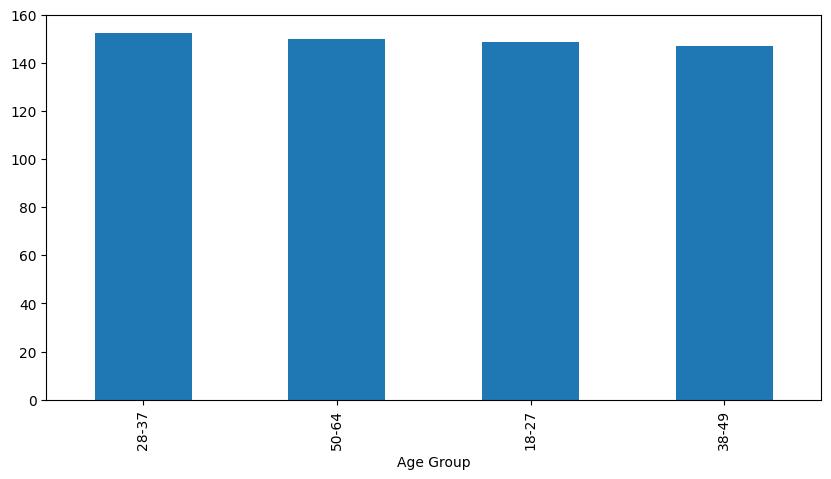

In [109]:
df.groupby('Age Group')['cart_value'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))


<Axes: xlabel='Age Group'>

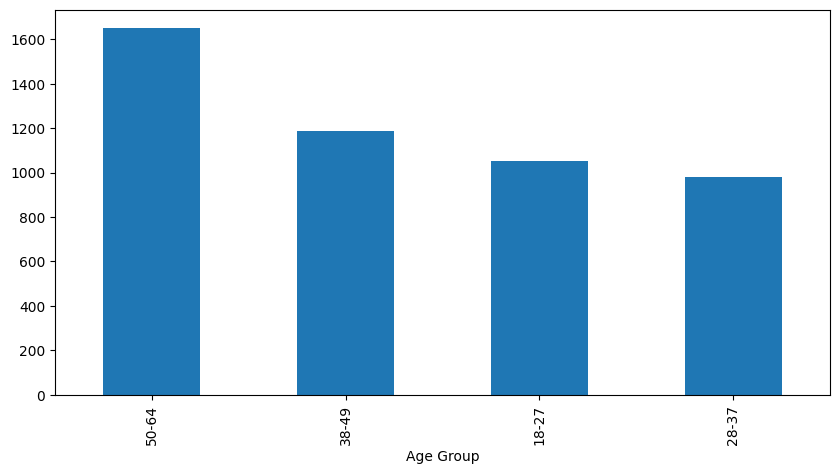

In [108]:
df.groupby('Age Group')['cart_items'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))



<Axes: xlabel='Age Group'>

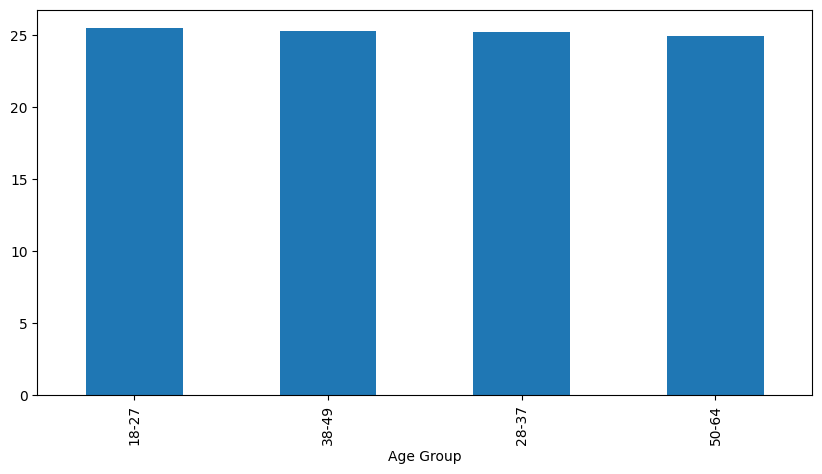

In [114]:
df.groupby('Age Group')['time_spent'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))


<Axes: xlabel='Age Group'>

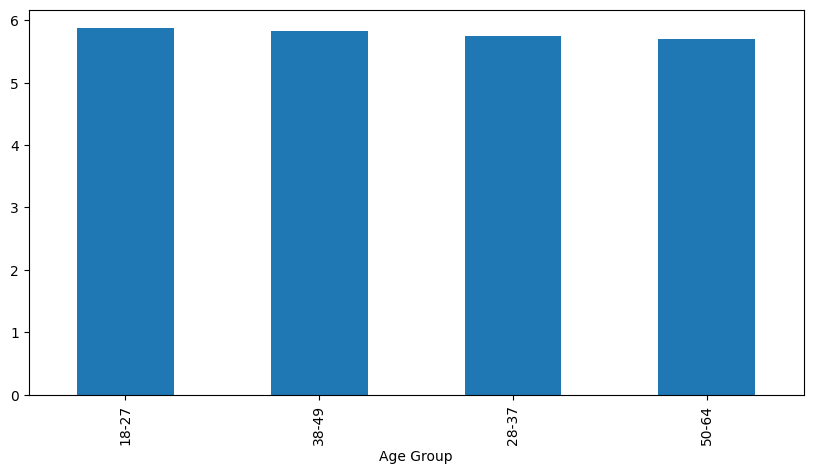

In [115]:
df.groupby('Age Group')['pages_visited'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))


<Axes: xlabel='device'>

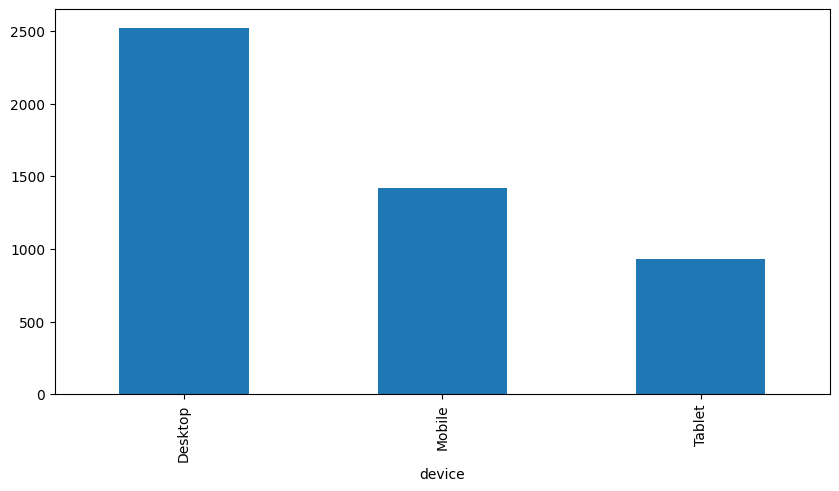

In [119]:
df.groupby('device')['checkout_status'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))


<Axes: xlabel='device'>

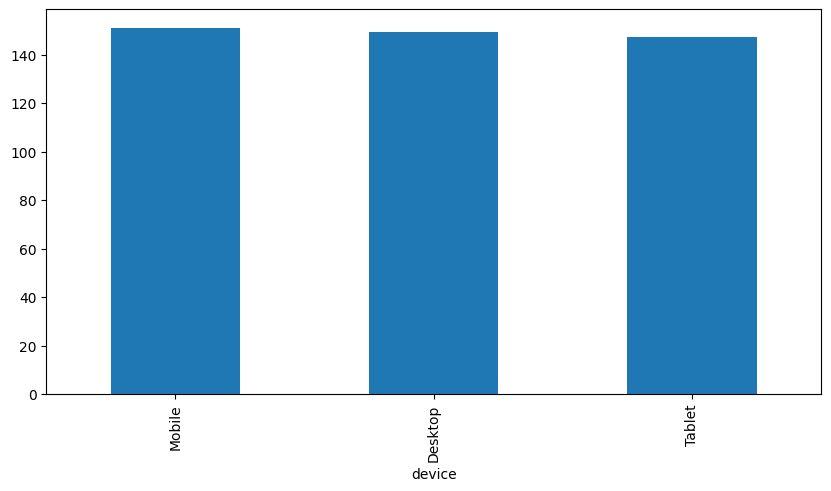

In [121]:
df.groupby('device')['cart_value'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))


In [ ]:
df.groupby('device')['pages_visited'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))


<Axes: xlabel='device'>

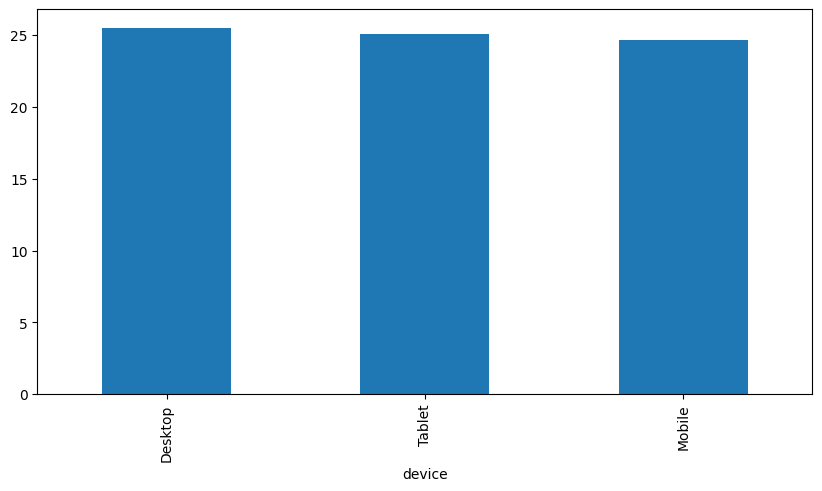

In [124]:
df.groupby('device')['time_spent'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))


In [93]:
age_group_cart_val = df.groupby('Age Group')['cart_value'].mean()

In [94]:
age_group_cart_val

Age Group
18-27    148.603818
28-37    152.494652
38-49    146.860109
50-64    150.079158
Name: cart_value, dtype: float64

In [97]:
age_group_cart_item = df.groupby('Age Group')['cart_items'].mean()
age_group_cart_item

Age Group
18-27    14.929725
28-37    15.149284
38-49    14.795627
50-64    15.018776
Name: cart_items, dtype: float64

In [99]:
age_group_time_spent = df.groupby('Age Group')['time_spent'].mean()
age_group_time_spent


Age Group
18-27    25.472834
28-37    25.189932
38-49    25.271297
50-64    24.898107
Name: time_spent, dtype: float64

In [100]:
age_group_pages_visited = df.groupby('Age Group')['pages_visited'].mean()
age_group_pages_visited

Age Group
18-27    5.877493
28-37    5.746421
38-49    5.820858
50-64    5.700787
Name: pages_visited, dtype: float64

In [131]:
df

,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location,Age Group
userID,,,,,,,,,,
1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1,50-64
2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3,50-64
3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4,18-27
4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2,18-27
5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4,18-27
...,...,...,...,...,...,...,...,...,...,...
4996,48,8,45.000000,11,25,278.92,0,Tablet,Location 5,38-49
4997,31,4,44.700747,9,12,78.97,0,Tablet,Location 2,28-37
4998,34,5,27.146624,7,19,139.42,1,Desktop,Location 4,28-37


1) Based on your analysis, what can you conclude about the behaviour or characteristics of users who complete check out vs those who do not?

Based on our analysis we can see that location and device behave similarly. There is no statistically significant difference between them. We can see that checkout status for all age groups are statistically significant.

People of age group 18-27 tend to check out more item when comaprede to other age group so we can focus on this age group. A majority of our sales are coming from the device such as desktop this could be due to features offered on the website .


2) How did you prepare your data for analysis? Describe your data cleaning and preparation approaches, and why these were the best choices.

Since the data set had so many missing values we had to take the following steps and approach.

One crucial step is removing duplicates from the dataset to ensure accurate analysis. Duplicate data entries need to be identified and eliminated in order to obtain the desired outcomes.

Another important aspect is identifying and handling empty cells. The number of empty cells should be determined, and values that cannot be replaced should be dropped from consideration.

To ensure accurate analysis, outliers present in the data must be addressed and removed. Outliers have the potential to negatively impact the final results, so their removal is essential.

Plotting graphs, to  utilize and identify any remaining outliers and derive conclusions based on the graphical results.

In my data cleaning process, I followed the conventional approach, incorporating the steps mentioned above.




3) What recommendations do you have for the product team? What should they do next? Be specific (i.e., who should they target, why and how).
 I would recommend to the product team to foucs more on the age group 18-27 as they have the highest checkout rates among the other ages group. 
